# SD210 - Data Challenge
<p>*Pengfei MI*</p>
<p>*21/04/2017*</p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Critere de performance
def compute_pred_score(y_true, y_pred):
    y_pred_unq =  np.unique(y_pred)
    for i in y_pred_unq:
        if((i != -1) & (i!= 1) & (i!= 0) ):
            raise ValueError('The predictions can contain only -1, 1, or 0!')
    y_comp = y_true * y_pred
    score = float(10*np.sum(y_comp == -1) + np.sum(y_comp == 0))
    score /= y_comp.shape[0]
    return score

X_train_fname = '../data/training_templates.csv'
y_train_fname = '../data/training_labels.txt'
X_test_fname  = '../data/testing_templates.csv'
X_train = pd.read_csv(X_train_fname, sep=',', header=None).values
X_test  = pd.read_csv(X_test_fname,  sep=',', header=None).values
y_train = np.loadtxt(y_train_fname, dtype=np.int)

## Partie 1: Investigation des données

In [2]:
print X_train.shape, X_test.shape, y_train.shape
print('n_samples : %d, n_features : %d' % X_train.shape)
print np.mean(y_train), np.unique(y_train)

(105600, 128) (8496, 128) (105600,)
n_samples : 105600, n_features : 128
0.0 [-1  1]


On a vu que l'ensemble d'entraînement est parfaitement équilibré.

Maintenant, on fait une standardisation et l'ACP dans l'ensemble d'entraînement, pour connaître comment les variables explicatives expliquent la variance.

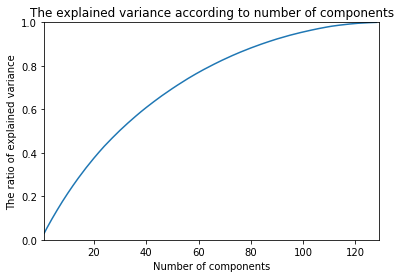

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()

X_train_scaled = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scaled)

ratio_sum = pca.explained_variance_ratio_.cumsum()

plt.figure(1)
plt.title("The explained variance according to number of components")
plt.plot(range(1, len(ratio_sum)+1), ratio_sum)
plt.xlim(1, len(ratio_sum)+1)
plt.ylim(0, 1)
plt.xlabel("Number of components")
plt.ylabel("The ratio of explained variance")
plt.show()

Selon le dessin, on peut voir que la courbe n'est pas très escarpé. Desormais, on va utiliser tous les variables explicatives, de plus, on utilise les données après ACP.

## Partie 2: Utilisation des classifieurs différents et la recherche des hyperparamètres optimals

### 2.1 Logistic Regression